## Szybka transformata Fouriera (FFT - Fast Fourier Transform)

Zapoznaj się ze sposobem działania transformacji Fouriera i jej praktycznym zastosowaniem. 

W poniższym ćwiczeniu korzystamy z biblioteki FFT będącej częścią pakietu scipy

In [0]:
from scipy import fft

#### Przykład 
Analiza sygnału wygenerowanego funkcją okresową $sin(2 \pi t)$. Częstotliowścią sygnału określamy liczbę pełnych zmian sygnału w określonej jednostce czasu. Przyjmując przedział $t:[0..1]$ częstotliwość funkcji $f(t) = sin(2 \pi t)$ wynozi 1 Hz. Zwizualizujmy ten sygnał: 

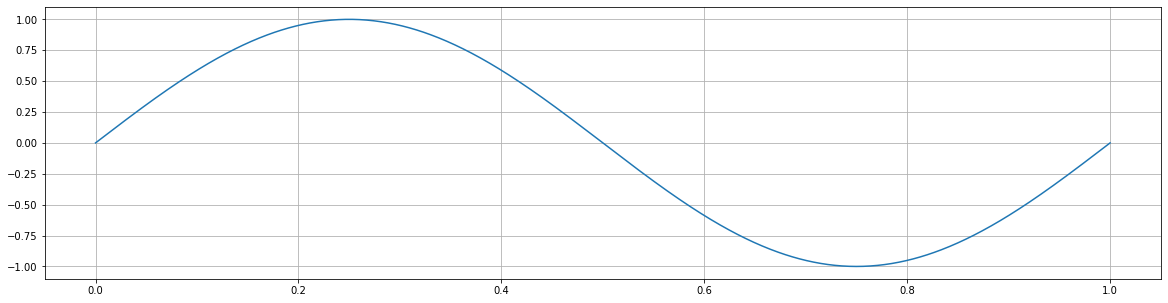

In [0]:
import numpy as np
# liczba próbek 
N = 1000
# częstotliwość 
F = 1
t = np.linspace(0.0, 1.0, N)
ft = np.sin(2*np.pi*t*F)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(t,ft)
plt.grid()
plt.show()

Manipulując parametrem F w powyższym kodzie mozemy zmieniać częstotliwość sygnału. 

Zastosujmy szybkąd transformatę Fouriera do spróbkowanego przebiegu tej funkcji. 

Wynikiem działania algorytmu jest widmo sygnału czyli reprezentacja częstotliwościowa. Na podstawie N próbek sygnału wyliczane jest N wartości zespolonego widma, jednak zazwyczaj interesuje nas moduł widma, który możemy wyznaczyć funkcją np.abs(). Element yf[0] zawiera składową średnią sygnału, yf[1:n//2] zawiera współczynniki odpowiadające dodatnim częstościom, a yf[n//2+1:]  współczynniki odpowiadające ujemnym częstościom. Dla naszych potrzeb wystarczy zwizualizować połowę tablicy yf (w tym przypadku druga część zawiera lustrzaną kopie widam z pierwszej części tablicy). 


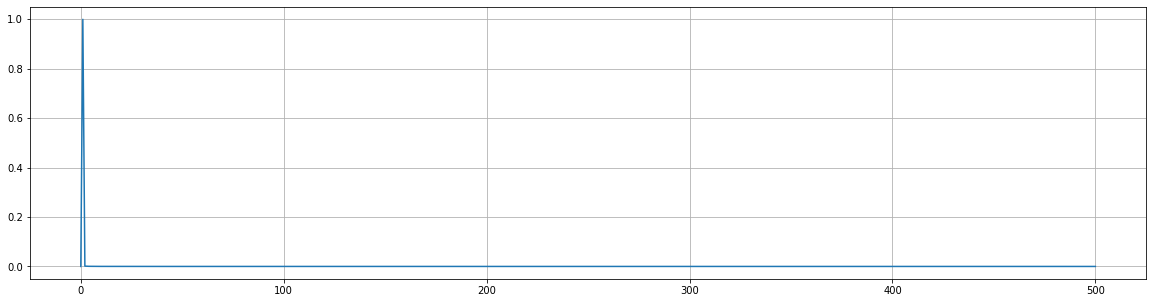

In [0]:
# odstęp próbkowanie
T = 1.0 / N
yf = fft.fft(ft)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

### Zadanie 1
Wygeneruj sygnał sinusoidalny składający się z dwóch lub więcej składowych o różnych częstotliwościach. Zwizualizuj sygnał i dokonaj jego analizy z wykorzystaniem FFT. 


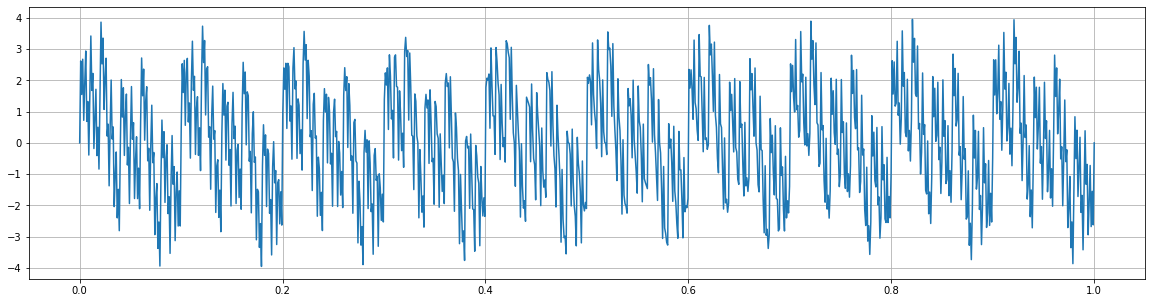

In [0]:
F = [10, 20, 50, 100, 200, 400]
ft = np.sin(2*np.pi*t*F[0]) + np.sin(2*np.pi*t*F[1]) + np.sin(2*np.pi*t*F[2] ) + np.sin(2*np.pi*t*F[3]) + np.sin(2*np.pi*t*F[4]) + np.sin(2*np.pi*t*F[5])
plt.plot(t,ft)
plt.grid()
plt.show()

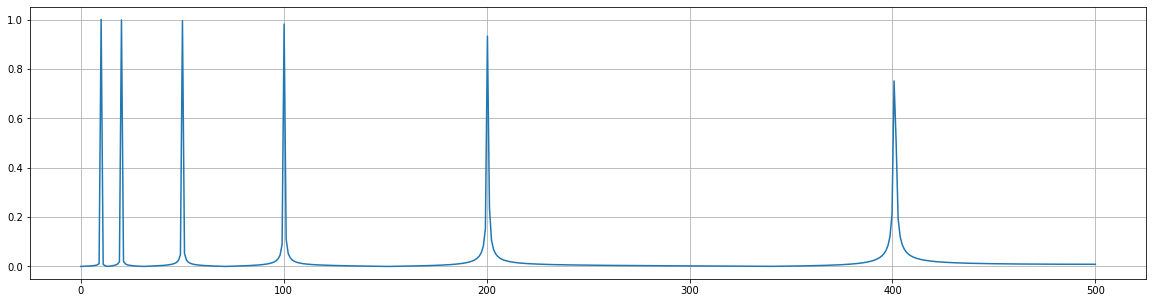

In [0]:
# odstęp próbkowanie
T = 1.0 / N
yf = fft.fft(ft)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

Na powyższym wykresie widzimy 6 "pików" sygnału, czyli tyle ile jest składowych sygnału wejściowego, więc FFT działa poprawnie.  

### Zadanie 2
Odszumianie sygnału. 
1. Wypełniamy tablicę wartościami funkcji sinus ("sygnał") zaburzonej niewielkim "szumem" np. dodając do każdej wartości wylosowaną liczbę funkcją rand(). 



In [0]:
from random import random
#częstotliwości
F = 4
ft = []

for i in t:
    ft.append(np.sin(np.sin(2*np.pi*i*F) + random()))

2. Proszę narysować wykres zaszumionej funkcji. 


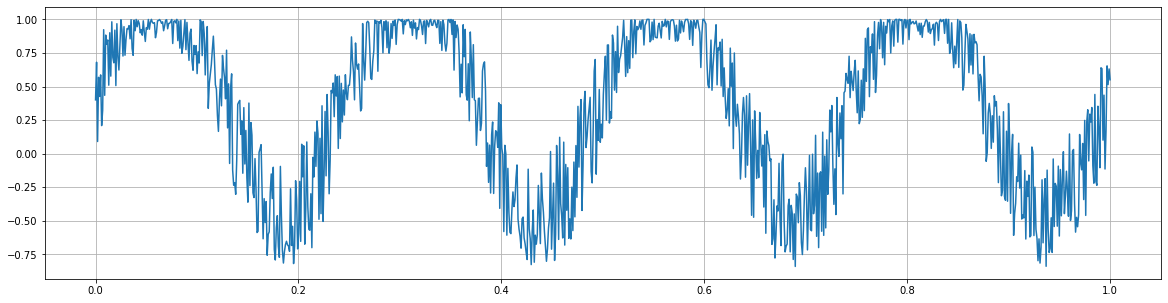

In [0]:
plt.plot(t, ft)
plt.grid()
plt.show()

3. Wykonać FFT dla takiego sygnału i narysować wykres transformaty Fouriera (widmo) tego sygnału (jak poprzednio). Po transformacie wyzerowac w widmie wszystkie elementy, których wartość bezwzględna jest mniejsza niz 50. W ten sposób usuwamy "szumy" z sygnału. 


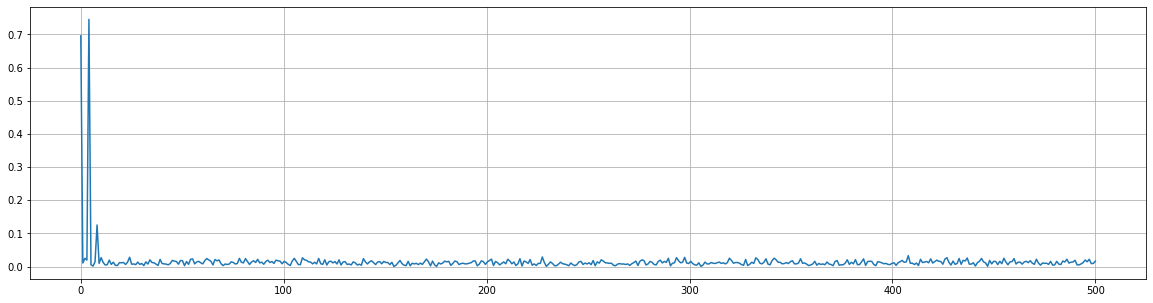

In [0]:
T = 1.0 / N
yf = fft.fft(ft)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
y = np.abs(yf[0:N//2])
plt.plot(xf, 2.0/N * y)
plt.grid()
plt.show()

Po odszumieniu sygnału, wykres transformaty Fouriera wygląda następująco : 

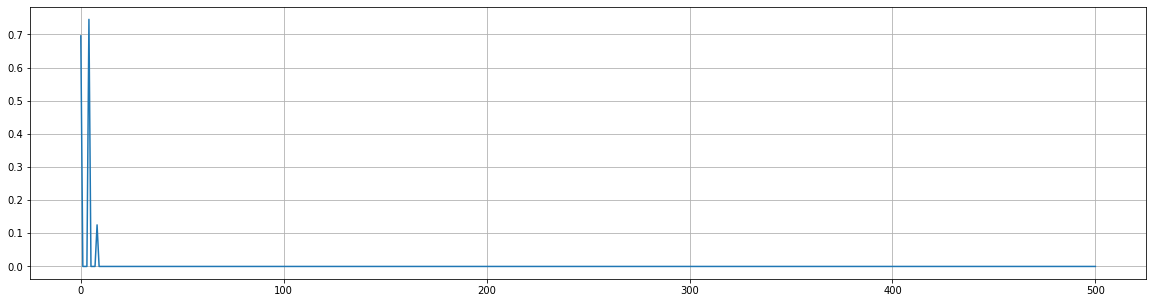

In [0]:
for i in range(len(y)):
    if y[i] < 50: y[i] = 0

plt.plot(xf, 2.0/N * y)
plt.grid()
plt.show()

4. Przeprowadzić odwrotną transformatę funkcją ifft(). Narysować wykres otrzymanej funkcji dla częsci rzeczywistej. Porównać z wejściowym wykresem sygnału. 


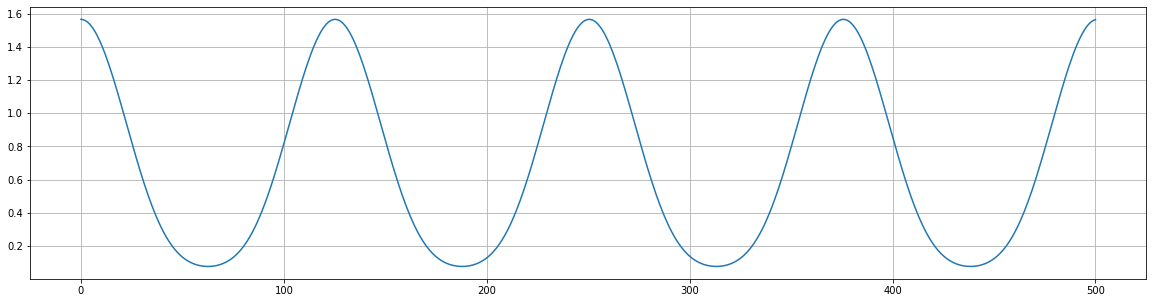

In [0]:
ift = fft.ifft(y)
plt.plot(xf, np.real(ift))
plt.grid()
plt.show()

Widać odrazu, że sygnał został odszumiony prawidłowo, sygnał jest gładki. 

### Zadanie 3 
Proszę nagrać własny glos lub jakikolwiek inny dźwięk i przenalizowac go przy pomocy FFT (jak powyżej).
Następnie poeksperymentować (wyciąć wybrane częstotliwości), dokonać odwrotnej transformaty i odsłuchać efekt. 

To zadanie wykonałem poza środowiskiem jupytera, ale poniżej umieszczam użyty kod oraz wyniki.

Poniższy kod generuje wykres sygnału z testowego pliku dzwiękowego, plik dzwiękowy można znalezc pod tym [linkiem](https://drive.google.com/file/d/1TSHxvEj4tlOWRk5icg9Ki8DYjdXv-ZLZ/view?usp=sharing).

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import fft


sample_rate, data = wavfile.read('test_sound.wav')
amount_of_samples = len(data)
scaled_data = data / (2.**15)
time_array = np.arange(0, float(amount_of_samples), 1) / sample_rate
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(time_array, scaled_data, linewidth=0.3, alpha=0.7, color='#004bc6')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.savefig('test_sound.png')
plt.show()

![alt text](https://drive.google.com/uc?id=1slipjHoHLItk26zo8PWtUuo2NppwBO3F)

Następnie analizuje powyższy wykres sygnału dzwiękowego za pomocą FFT.

In [0]:
T = 1.0 / amount_of_samples
yf = fft.fft(scaled_data)
xf = np.linspace(0.0, 1.0/(2.0*T), amount_of_samples//2)
plt.plot(xf, (np.abs(yf[0:amount_of_samples//2])))
plt.grid()
plt.savefig('test_sound_after_fft.png')
plt.show()

![alt text](https://drive.google.com/uc?id=15TPLlCq6TfFFFaW-DbDf2L6Ityrzj7YJ)

Następnie usunałem częstotliości pomiędzy 10000 Hz a 25000 Hz z naszego sygnału : 

In [0]:
for i in range(len(xf)):
    if 10000 < xf[i] < 25000:
        yf[i] = 0

plt.plot(xf, (np.abs(yf[0:amount_of_samples//2])))
plt.grid()
plt.savefig('test_sound_remove.png')
plt.show()

![alt text](https://drive.google.com/uc?id=1SE2ADXw3oyrh5iFtbaThcPiVskD4SCjv)

Następnie dokonałem odwrotnej transformaty oraz zapisałem powstałą ścieżke dzwiękową:

In [0]:
y = np.real(fft.ifft(yf))
wavfile.write("test_sound_after_fft.wav", len(y), y)

plt.plot(time_array, y)
plt.grid()
plt.savefig('test_sound_remove1.png')
plt.show()

![alt text](https://drive.google.com/uc?id=1pBvdG8zoL6RcL4CVV-QMbuZYsBj1tIjr)

Dzwięk, który powstał można znaleźć pod tym [linkiem](https://drive.google.com/file/d/13bnbusW82qC-EKlZBY7bkHhs8SxFAhNO/view?usp=sharing), odrazu słychać, że dzwięk został zmodulowany.